# CSE 252B: Computer Vision II, Winter 2018 – Assignment 3
### Instructor: Ben Ochoa
### Due: Wednesday, February 21, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Programing):  Estimation of the camera pose - Outlier rejection (20 points)
  Download input data from the course website.  The file
  hw3_points3D.txt contains the coordinates of 60 scene points
  in 3D (each line of the file gives the $\tilde{X}_i$, $\tilde{Y}_i$,
  and $\tilde{Z}_i$ inhomogeneous coordinates of a point).  The file
  hw3_points2D.txt contains the coordinates of the 60
  corresponding image points in 2D (each line of the file gives the
  $\tilde{x}_i$ and $\tilde{y}_i$ inhomogeneous coordinates of a
  point).  The corresponding 3D scene and 2D image points contain both
  inlier and outlier correspondences.  For the inlier correspondences,
  the scene points have been randomly generated and projected to image
  points under a camera projection matrix (i.e., $\boldsymbol{x}_i = \boldsymbol{P}
  \boldsymbol{X}_i$), then noise has been added to the image point
  coordinates.

  The camera calibration matrix was calculated for a $1280 \times 720$
  sensor and $45\,^\circ$ horizontal field of view lens.  The
  resulting camera calibration matrix is given by
  
  $\boldsymbol{K} = \left[
    \begin{array}{c c c}
      1545.0966799187809 & 0 & 639.5\\
      0 & 1545.0966799187809 & 359.5\\
      0 & 0 & 1
    \end{array}\right]$
    
  For each image point $\boldsymbol{x} = (x, y, w)^\top = (\tilde{x},
  \tilde{y}, 1)^\top$, calculate the point in normalized coordinates
  $\hat{\boldsymbol{x}} = \boldsymbol{K}^{-1} \boldsymbol{x}$.

  Determine the set of inlier point correspondences using the
  M-estimator Sample Consensus (MSAC) algorithm, where the maximum
  number of attempts to find a consensus set is determined adaptively.
  For each trial, use the 3-point algorithm of Finsterwalder (as
  described in the paper by Haralick et al.) to estimate the camera
  pose (i.e., the rotation $\boldsymbol{R}$ and translation $\boldsymbol{t}$ from the
  world coordinate frame to the camera coordinate frame), resulting in
  up to 4 solutions, and calculate the error and cost for each
  solution.  Note that the 3-point algorithm requires the 2D points in
  normalized coordinates, not in image coordinates.  Calculate the
  projection error, which is the (squared) distance between projected
  points (the points in 3D projected under the normalized camera
  projection matrix $\hat{\boldsymbol{P}} = [\boldsymbol{R} | \boldsymbol{t}]$) and the
  measured points in normalized coordinates (hint: the error tolerance
  is simpler to calculate in image coordinates using $\boldsymbol{P} =
  \boldsymbol{K} [\boldsymbol{R} | \boldsymbol{t}]$ than in normalized coordinates using
  $\hat{\boldsymbol{P}} = [\boldsymbol{R} | \boldsymbol{t}]$).

 hint: this problem has codimension 2).

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.linalg import expm

x=np.loadtxt('hw3_points2D.txt').T
X=np.loadtxt('hw3_points3D.txt').T
print('x is', x.shape)
print('X is', X.shape)

K = np.array([[1545.0966799187809, 0, 639.5], 
      [0, 1545.0966799187809, 359.5], 
      [0, 0, 1]])

print('K =')
print(K)

def toHomo(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))
def fromHomo(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1,:]/x[-1,:]

def proj(P,X):
    # projects 3d points X to 2d using projection matrix P
    return fromHomo(np.matmul(P,toHomo(X)))
    
    
def displayResults(R, t, K, x, X, inliers, iters, cost):
    print ('R = ')
    print (R)
    print ('t = ')
    print (t)
    print ('cost = ', cost)
    print ('itterations = ', iters)

    x_proj = proj(np.matmul(K,np.hstack((R,t))),X)
    plt.plot(x[0,:], x[1,:],'.k')
    plt.plot(x_proj[0,:], x_proj[1,:],'.r')
    for i in range(x.shape[1]):
        if i in inliers:
            line_style = '-'
        else:
            line_style = ':'
        plt.plot([x[0,i], x_proj[0,i]], [x[1,i], x_proj[1,i]], line_style+'r')

    plt.show()
    

x is (2, 60)
X is (3, 60)
K =
[[  1.54509668e+03   0.00000000e+00   6.39500000e+02]
 [  0.00000000e+00   1.54509668e+03   3.59500000e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in sqrt


R = 
[[ 0.27228322 -0.69654422  0.66384336]
 [ 0.67200132 -0.35612627 -0.64929832]
 [ 0.68867704  0.62289665  0.37111143]]
t = 
[[   4.90426621]
 [   8.6987014 ]
 [ 175.77242502]]
cost =  140.387783551
itterations =  11


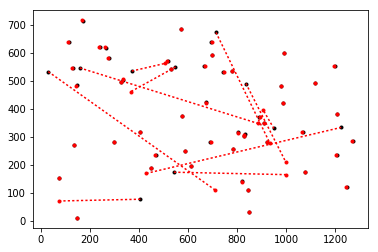

inliers:  [ 0  1  2  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 45 46 47 49]
inlier count:  45


In [167]:
def computeModel(x, x_full, X_full, K, sampleidx):
    #print('computeModel')
    x = x[:,sampleidx]
    X = X_full[:,sampleidx]
    x_hom = x_full[:,sampleidx]

    P, bad = finsterwalder(x, X)
    R_model = np.zeros((3,3))
    t_model = np.zeros((3,3))
    if bad==1:
        return R_model, t_model, bad
    n,_,_ = P.shape
    errors = np.zeros((n,1))
    count = 0
    cost_min = np.inf
    tolerance = chi2.ppf(0.95,2)
    
    for i in range(0,n):
        '''check shape'''
        R, t, bad = umeyama(X.T, P[i,:,:])

        if bad==1:
            continue
        '''check shape'''
        error_vals = computeError(x_full, X_full, R, t, K)
        cost = computeCost(error_vals, tolerance)
        errors[i] = error_vals.sum()
        if count==0:
            R_model = R
            t_model = t
            count = 1
            cost_min = cost
        elif cost_min > cost:
            R_model = R
            t_model = t
            cost_min = cost
    return R_model, t_model, bad
    
def finsterwalder(x, X):
    #print('finsterwalder')
    bad = 0
    P = -1*np.ones((3,3))
    a = np.sqrt(np.sum(np.square(X[:,1]-X[:,2])))
    b = np.sqrt(np.sum(np.square(X[:,0]-X[:,2])))
    c = np.sqrt(np.sum(np.square(X[:,0]-X[:,1])))
    f = 1
    j = np.zeros((3,3))
    for i in range(0,3):
        u_x = x[0,i]/x[2,i]
        v_x = x[1,i]/x[2,i]
        z = np.array([u_x,v_x,f]).squeeze()
        j[i,:] = 1.0/np.sqrt(u_x**2+v_x**2+f**2)*z
        
        
    cos_alpha = j[1,:].dot(j[2,:])
    cos_beta = j[0,:].dot(j[2,:])
    cos_gamma = j[0,:].dot(j[1,:])
    
    sin2_alpha = 1.0-cos_alpha**2
    sin2_beta = 1.0-cos_beta**2
    sin2_gamma = 1.0-cos_gamma**2
    
    a2 = a**2
    b2 = b**2
    c2 = c**2
    
    G = c2*(c2*sin2_beta - b2*sin2_gamma)
    H = b2*(b2-a2)*sin2_gamma + c2*(c2+2*a2)*sin2_beta + 2*b2*c2*(-1+cos_alpha*cos_beta*cos_gamma)
    I = b2*(b2-c2)*sin2_alpha + a2*(a2+2*c2)*sin2_beta + 2*a2*b2*(-1+cos_alpha*cos_beta*cos_gamma)
    J = a2*(a2*sin2_beta-b2*sin2_alpha)
    
    eq = np.array([G, H, I, J]).squeeze()
    lambdas = None
    try:
        lambdas = np.roots(eq).reshape(-1,1)
    except ValueError:
        P = -1*np.ones((3,3))
        bad = 1
        return P, bad
    

    if lambdas is None:
        bad = 1
        return P, bad
        
    spos = 0
    while True:
        flag = 0
        lambda0 = 0
        for i in range(spos,lambdas.shape[0]):
            if np.isreal(lambdas[i]):
                lambda0 = lambdas[i]
                flag = 1
                spos = i+1
                break
                
        if not flag:
            bad = 1
            return P, bad
        
        A = 1+lambda0
        B = -cos_alpha
        C = (b2-a2)/b2 - lambda0*c2/b2
        D = -lambda0*cos_gamma
        E = (a2/b2 + lambda0*c2/b2)*cos_beta
        F = -a2/b2 + lambda0*(b2-c2)/b2
        
        p = np.sqrt(B**2 - A*C)
        q = np.sign(B*E - C*D)*np.sqrt(E**2-C*F)

        
        z = np.array([-B+p, -B-p]).squeeze()
        m = 1.0/C*z
        z = np.array([-E+q, -E-q]).squeeze()
        n = 1.0/C*z

        A11 = b2-(m[0]**2)*c2
        B11 = c2*(cos_beta-n[0])*m[0]-b2*cos_gamma
        C11 = -c2*(n[0]**2)+2*c2*n[0]*cos_beta+b2-c2
        ularge1 = (-np.sign(B11)/A11)*(abs(B11) + np.sqrt(B11**2 - A11*C11))
        usmall1 = C11/(A11*ularge1)
        vlarge1 = ularge1*m[0]+n[0]
        vsmall1 = usmall1*m[0]+n[0]
        
        A12 = b2-(m[1]**2)*c2
        B12 = c2*(cos_beta-n[1])*m[1]-b2*cos_gamma
        C12 = -c2*(n[1]**2)+2*c2*n[1]*cos_beta+b2-c2
        ularge2 = (-np.sign(B12)/A12)*(abs(B12)+np.sqrt(B12**2-A12*C12))
        usmall2 = C12/(A12*ularge2)
        vlarge2 = ularge2*m[1]+n[1]
        vsmall2 = usmall2*m[1]+n[1]
        
        if np.isreal(ularge1) or np.isreal(usmall1) or np.isreal(ularge2) or np.isreal(usmall2):
            break
            
    u_values = [ularge1, usmall1, ularge2, usmall2]
    v_values = [vlarge1, vsmall1, vlarge2, vsmall2]
    
    P = np.zeros((4,3,3))
    count = -1
    for i in range(0,4):
        if np.isnan(u_values[i]) or np.isnan(v_values[i]):
            continue
        if np.isreal(u_values[i]) and np.isreal(v_values[i]):
            den = 1+u_values[i]**2-2*u_values[i]*cos_gamma
            s1 = np.sqrt(c2/den)
            s2 = u_values[i]*s1
            s3 = v_values[i]*s1
            ss = np.array([s1,s2,s3]).reshape(-1,1)
            count+=1
            P[count,:,:] = np.multiply(j,ss)
        
    if count>=0:
        P = P[0:count+1,:,:]
    else:
        bad = 1
        return P,bad

    return P, bad

def umeyama(X, Y, c=1):
    R = np.zeros((3,3))
    t = np.zeros((3,1))
    bad = 0
    n, m = X.shape
    muX = X.mean(0).reshape(-1,1)
    muY = Y.mean(0).reshape(-1,1)
    sigmaX = 0
    for i in range(0,n):
        delta = X[i,:].reshape(-1,1)-muX
        sigmaX = sigmaX+delta.T.dot(delta)
                    
    sigmaX /= n

    l = muX.ravel().shape[0]
    SIGMA = np.zeros((l,l))
    for i in range(0,n):
        SIGMA = SIGMA + (Y[i,:].reshape(-1,1)-muY).reshape(-1,1).dot((X[i,:].reshape(-1,1)-muX).reshape(-1,1).T)
        
    SIGMA = 1/n*SIGMA
    if np.linalg.matrix_rank(SIGMA)<m-1:
        R = np.zeros((3,3))
        bad = 1
        return R, t, bad
    
    U, D, Vt = np.linalg.svd(SIGMA)
    D = D*np.eye(D.shape[0])

    S = np.eye(l)
    if np.linalg.matrix_rank(SIGMA)==m-1:
        if abs(np.linalg.det(U)*np.linalg.det(Vt.T)+1)<=0.000001:
            S[-1,-1] = -1
    
    R = U.dot(S.dot(Vt))
    if c==-1:
        c = 1/(sigmaX)*np.trace(D*S)
    
    t = (muY - c*R.dot(muX)).reshape(3,1)
    return R, t, bad
    
def computeError(x, X, R, t, K):
    m, n = x.shape
    H = np.matmul(K,np.concatenate((R,t),axis=1))
    x_pred = proj(H,X)

    errors = np.zeros((n,1))
    for i in range(0,n):
        errors[i] = np.sum(np.square(x[:1,i]-x_pred[:1,i]))
    return np.array(errors).squeeze()

def computeCost(errors, tolerance):
    n = errors.flatten().shape[0]
    cost = 0
    for i in range(0,n):
        if errors[i]<=tolerance:
            cost+=errors[i]
        else:
            cost+=tolerance
    return cost
    
def MSAC(x, x_homo, X, K, threshold, p, tolerance, seed):
    """your code here"""
    max_trials = np.inf
    min_cost = np.inf
    trials = 0
    N = x.shape[1]
    inlier_pos = [-1]
    np.random.seed(seed)
    R = np.eye(3) # estimated rotation matrix
    t = np.array([[0,0,100]]).T # estimated translation
    inliers = np.sort(np.random.choice(x.shape[1],35,replace=False))
    
    while(trials<max_trials and min_cost>threshold):
        sampleidx = np.random.choice(x.shape[1],3,replace=False)
        R, t, bad = computeModel(x, x_homo, X, K, sampleidx)
        if bad==1:
            continue
        errors = computeError(x_homo,X,R,t,K)
        cost = computeCost(errors, tolerance)
        if min_cost>cost:
            min_cost = cost
            inliers = np.argwhere(errors<tolerance).ravel()
            w = inliers.shape[0]/N
            max_trials = np.log(1-p)/np.log(1-w**3)
        trials += 1
    
    # indices of inliers (must be sorted)
    inliers = np.sort(inliers)
    return R, t, inliers, min_cost, trials

# MSAC hyperparameters (add any additional hyperparameters necessary here. For example p)
# You should pass these hyperparameters as additional paramters to MSAC(...)
max_iters=1
p = 0.99
threshold = 0
alpha = 0.95
sigma = 1
tolerance = sigma*chi2.ppf(alpha,2)
seed = 10
x_homo = toHomo(x)
x_hat = np.linalg.inv(K).dot(x_homo)

R_MSAC, t_MSAC, inliers, cost_MSAC, iters_MSAC = MSAC(x_hat, x_homo, X, K, threshold, p, tolerance, seed)
displayResults(R_MSAC, t_MSAC, K, x, X, inliers, iters_MSAC, cost_MSAC)
print('inliers: ', inliers)
print('inlier count: ', len(inliers))

## Problem 2 (Programing): Estimation of the camera pose - Linear Estimate (30 points)
  Estimate the normalized camera projection matrix
  $\hat{\boldsymbol{P}}_\text{linear} = [\boldsymbol{R}_\text{linear} |
  \boldsymbol{t}_\text{linear}]$ from the resulting set of inlier
  correspondences using the linear estimation method (based on the
  EPnP method) described in lecture.

R = 
[[ 0.27810566 -0.69096762  0.66724882]
 [ 0.66315912 -0.36441811 -0.65377322]
 [ 0.69489368  0.62431017  0.35687474]]
t = 
[[   5.55031212]
 [   7.74045934]
 [ 175.8968773 ]]
cost =  95.5030440477
itterations =  1


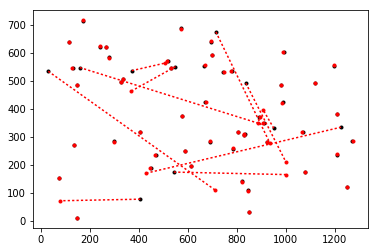

In [168]:
def EPnP(x, X, K, x_full, X_full):
    """your code here"""
    R = np.eye(3) # estimated rotation matrix
    t = np.array([[0,0,100]]).T # estimated translation
    cost = np.inf # linear cost
    
    muX = np.mean(X,axis=1).reshape(-1,1)
    n = X.shape[1]
    SIGMAX = np.zeros((3,3))
    for i in range(0,n):
        SIGMAX += (X[:,i].reshape(-1,1)-muX).dot((X[:,i].reshape(-1,1)-muX).T)
        
    SIGMAX = 1/(n-1)*SIGMAX
    
    U, D, Vt = np.linalg.svd(SIGMAX)
    V = Vt.T
    sigmaX = np.trace(SIGMAX)
    s = np.sqrt(sigmaX/3)
    C1 = muX
    C2 = s*V[:,0].reshape(3,1)+muX
    C3 = s*V[:,1].reshape(3,1)+muX
    C4 = s*V[:,2].reshape(3,1)+muX
    
    
    Xcam = np.zeros((n,3))
    LX = np.zeros((2*n,12))
    alphas = np.zeros((n,4))
    j = 0
    for i in range(0,n):
        alphais = (1/s)*Vt.dot(X[:,i].reshape(-1,1)-C1)
        a1 = 1-sum(alphais)
        a2 = alphais[0]
        a3 = alphais[1]
        a4 = alphais[2]
        alphas[i,:] = [a1,a2,a3,a4]
        xi = x[0,i]/x[2,i]
        yi = x[1,i]/x[2,i]
        LX[j,:] = [a1, 0, -a1*xi, a2, 0, -a2*xi, a3, 0, -a3*xi, a4, 0, -a4*xi]
        LX[j+1,:] = [0, a1, -a1*yi, 0, a2, -a2*yi, 0, a3, -a3*yi, 0, a4, -a4*yi]
        j += 2
    
    _,_,Vt = np.linalg.svd(LX)
    M = Vt[-1,:]
    c0 = M[0:3]
    c1 = M[3:6]
    c2 = M[6:9]
    c3 = M[9:12]
    for i in range(0,n):
        Xcam[i,:] = alphas[i,0]*c0 + alphas[i,1]*c1 + alphas[i,2]*c2 + alphas[i,3]*c3
        
    muXcam = Xcam.mean(0).reshape(-1,1)
    SIGMAXcam = np.zeros((3,3))
    for i in range(0,n):
        SIGMAXcam += (Xcam[i,:].reshape(-1,1)-muXcam).dot((Xcam[i,:].reshape(-1,1)-muXcam).T)
        
    SIGMAXcam = 1/(n-1)*SIGMAXcam
    sigmaXcam = np.trace(SIGMAXcam)
    
    beta = np.sqrt(sigmaX/sigmaXcam)
    if(muXcam[2]<0):
        beta = beta*-1
        
    Xcam = beta*Xcam
    R, t, bad = umeyama(X.T, Xcam, 1)
    errors = computeError(x_full,X_full,R,t,K)
    cost = computeCost(errors, tolerance)
    return R, t, cost

R_EPnP, t_EPnP, cost_EPnP = EPnP(x_hat[:,inliers], X[:,inliers], K, x_homo, X)
displayResults(R_EPnP, t_EPnP, K, x, X, inliers, 1, cost_EPnP)

## Problem 3 (Programing): Estimation of the camera pose - Nonlinear Estimate (30 points) 
  Use $\boldsymbol{R}_\text{linear}$ and $\boldsymbol{t}_\text{linear}$ as an
  initial estimate to an iterative estimation method, specifically the
  Levenberg-Marquardt algorithm, to determine the Maximum Likelihood
  estimate of the camera pose that minimizes the projection error
  under the normalized camera projection matrix $\hat{\boldsymbol{P}} =
  [\boldsymbol{R} | \boldsymbol{t}]$.  You must parameterize the camera rotation
  using the angle-axis representation $\boldsymbol{\omega}$ (where
  $[\boldsymbol{\omega}]_\times = \ln \boldsymbol{R}$) of a 3D rotation, which is
  a 3-vector.

[[ 73.59122782]]
iter 1 cost 72.908960
iter 2 cost 72.908912
iter 3 cost 72.908912
R = 
[[ 0.27791524 -0.6911285   0.66716154]
 [ 0.6619467  -0.36551543 -0.65438905]
 [ 0.69612476  0.62349007  0.35590792]]
t = 
[[   5.53098571]
 [   7.60875224]
 [ 175.90438326]]
cost =  [[ 72.90891199]]
itterations =  3


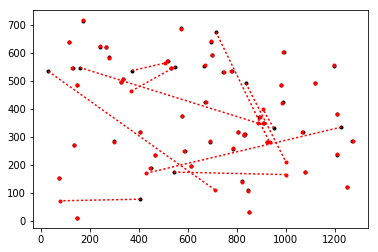

In [173]:
def mysinc(x):
    if x==0:
        return 1.0
    else:
        return np.sin(x)/x
    
def calcError(x_meas, x_est):
    return x_meas-x_est

def calcCost(error, cov_inv):
    return error.T.dot(cov_inv.dot(error))
    
def R2w(R):
    # given a rotation matrix R return the angle-axis representation
    """your code here"""
    _,_,Vrott = np.linalg.svd(R-np.eye(3,3))
    Vrot = Vrott.T
    V = Vrot[:,2].reshape(-1,1)
    V_hat = np.array([R[2,1] - R[1,2], R[0,2] - R[2,0], R[1,0] - R[0,1]]).T
    sin_theta = V.T.dot(V_hat)/2
    cos_theta = (np.trace(R)-1)/2
    theta = np.arctan2(sin_theta, cos_theta)
    w = theta*V/np.sqrt(sum(np.square(V)))
    if theta>np.pi:
        w = w*(1-(2*np.pi/theta)*np.ceil((theta-np.pi)/(2*np.pi)))
    return w

def w2R(w):
    # given the angle-axis representation w return the rotation matrix
    """your code here"""
    wx = np.array([[0, -w[2], w[1]], [w[2], 0, -w[0]], [-w[1], w[0], 0]])
    return expm(wx)

def getH(R,t):
    return np.concatenate((R,t),axis=1)

def toP(w,t):
    return np.array([w[0], w[1], w[2], t[0], t[1], t[2]]).reshape(-1,1)

def fromP(p):
    w = p[0:3]
    t = p[3:6]
    return w,t

def jacobian(x_hat, X, P):
    n = X.shape[1]
    J = np.zeros((2*n,6))
    w, t = fromP(P)
    theta = np.sqrt(sum(np.square(w)))
    s = (1-np.cos(theta))/(theta**2)
    wx = np.array([[0, -w[2], w[1]],[w[2], 0, -w[0]],[-w[1], w[0], 0]])
    j = 0
    for i in range(0,n):
        x = np.array([x_hat[0,i]/x_hat[2,i], x_hat[1,i]/x_hat[2,i]])
        m1=np.array([[1/x_hat[2,i], 0, -x[0]/x_hat[2,i]],[0, 1/x_hat[2,i], -x[1]/x_hat[2,i]]])
        ax = -1*np.array([[0, -X[2,i], X[1,i]],[ X[2,i], 0, -X[0,i]],[ -X[1,i], X[0,i], 0]])
        if abs(theta)<0.00001:
            m2=ax
        else:
            wca = np.cross(w.T,X[:,i].reshape(1,-1)).T
            wcax = -1*np.array([[0, -wca[2], wca[1]],[ wca[2], 0, -wca[0]],[ -wca[1], wca[0], 0]])
            dtw = w.T/np.sqrt(sum(np.square(w)))
            dst = (np.sin(theta))/(theta**2) -2*s/theta
            term2 = wca*(np.cos(theta)/theta - np.sin(theta)/(theta**2))*dtw
            m2 = mysinc(theta)*ax + term2 + np.cross(w.T, wca.T).T.dot(dst*dtw) + s*np.eye(3,3).dot((wx.dot(ax)+wcax))
        A = np.concatenate((m1.dot(m2),m1),axis=1)
        J[j:j+2,:]=A
        j=j+2
    return J

# use linear estimate as an initalization for LM
w_LM = R2w(R_EPnP)
t_LM = t_EPnP

x_hatIn = x_hat[:,inliers]
x_normhat = fromHomo(x_hatIn)
X_In = X[:,inliers]

def LMstep(w, t, x, X, K, l, v):
    # inputs:
    # w current estimate of rotation in angle-axis representation
    # t current estimate of t
    # x 2D points
    # X 3D points
    # K camera calibration matrix 
    # l LM lambda parameter
    # v LM change of lambda parameter
    # output:
    # R updated by a single LM step
    # t updated by a single LM step
    # cost
    # l accepted lambda parameter
    
    """your code here"""
    counter = 0
    while counter<1000:
        x_meas = x.T.reshape(1,-1).T
        scale = 1/K[0,0]**2
        sigma = scale*np.eye(x_meas.squeeze().shape[0])
        cov_inv = np.linalg.inv(sigma)

        p_hat = getH(w2R(w),t)
        x_est = proj(p_hat,fromHomo(X)).T.reshape(1,-1).T
        err = calcError(x_meas,x_est)
        cost = calcCost(err,cov_inv)

        x_predhat = p_hat.dot(X)
        J = jacobian(x_predhat, fromHomo(X), toP(w,t))
        subterm1 = J.T.dot(cov_inv.dot(J))
        term1 = np.linalg.inv(subterm1+l*np.eye(subterm1.shape[0]))
        term2 = J.T.dot(cov_inv.dot(err))
        delta = term1.dot(term2)
        
        P_new = toP(w,t)+delta
        w_LM, t_LM = fromP(P_new)
        p_new = getH(w2R(w_LM), t_LM)
        x_new = proj(p_new,fromHomo(X)).T.reshape(1,-1).T
        err = calcError(x_meas,x_new)
        cost_new = calcCost(err,cov_inv)
        if cost_new<cost:
            return w_LM, t_LM, cost_new, l/v
        else:
            l = l*v        
    return w, t, cost, l

def LM(x, X, w_LM, t_LM, x_hat, K):
    # LM hyperparameters
    l=.001
    v=10
    tol = 10e-07
    max_iters=10
    
    X_inh = X
    X = toHomo(X_inh)
    x_meas = x.T.reshape(1,-1).T
    scale = 1/K[0,0]**2
    sigma = scale*np.eye(x_meas.squeeze().shape[0])
    cov_inv = np.linalg.inv(sigma)
    
    # initial error estimate
    p_hat = getH(w2R(w_LM),t_LM)
    x_est = proj(P_hat,X_inh).T.reshape(1,-1).T
    error = calcError(x_meas,x_est)
    cost = calcCost(error,cov_inv)
    cost_prev = cost+1
    x_predhat = p_hat.dot(X)
    J = jacobian(x_predhat, fromHomo(X), toP(w_LM,t_LM))
    costs = []
    costs.append(cost)
    print(cost)

    i = 0
    # LM optimization loop
    while tol<abs(cost_prev-cost):
        cost_prev = cost
        w_LM, t_LM, cost_LM, l = LMstep(w_LM, t_LM, x, X, K, l, v)
        cost = cost_LM
        costs.append(cost[0])
        print ('iter %d cost %f'%(i+1, cost_LM))
        i+=1
    return w_LM, t_LM, cost_LM, l, costs, i

w_LM, t_LM, cost_LM, l, costs, iters = LM(x_normhat, X_In, w_LM, t_LM, x_hatIn, K)

R_LM = w2R(w_LM)
    
displayResults(R_LM, t_LM, K, x, X, inliers, iters, cost_LM)

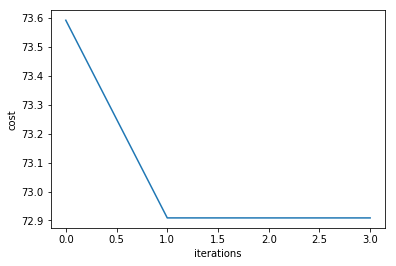

In [170]:
from matplotlib import pyplot as plt
plt.plot(range(len(costs)),costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()